In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
X=df.drop(['RowNumber','Surname','Geography','Gender','Exited'],axis=1)

In [12]:
y=df['Exited']

In [13]:
X

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,42,2,0.00,1,1,1,101348.88
1,15647311,608,41,1,83807.86,1,0,1,112542.58
2,15619304,502,42,8,159660.80,3,1,0,113931.57
3,15701354,699,39,1,0.00,2,0,0,93826.63
4,15737888,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64
9996,15569892,516,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,36,7,0.00,1,0,1,42085.58
9998,15682355,772,42,3,75075.31,2,1,0,92888.52


In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Exited', ylabel='count'>

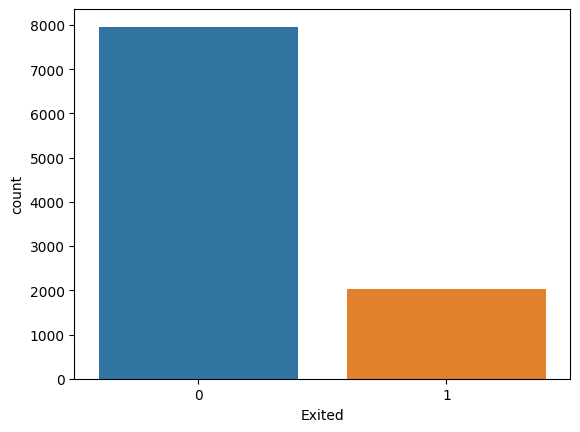

In [19]:
sns.countplot(x=y)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [24]:
X_scaled

array([[-0.78321342, -0.32622142,  0.29351742, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.60653412, -0.44003595,  0.19816383, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.99588476, -1.53679418,  0.29351742, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.47928179,  0.60498839, -0.27860412, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-0.11935577,  1.25683526,  0.29351742, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.87055909,  1.46377078, -1.04143285, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape

(8000, 9)

In [43]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=2,max_iter=100,activation='relu')

In [44]:
ann.fit(X_train,y_train)

C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=2)

In [31]:
y_pred=ann.predict(_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [34]:
accuracy_score(y_test,y_pred)

0.8285

In [36]:
CF=confusion_matrix(y_test,y_pred)

In [38]:
CF

array([[1499,  108],
       [ 235,  158]], dtype=int64)

In [37]:
ConfusionMatrixDisplay(CF)

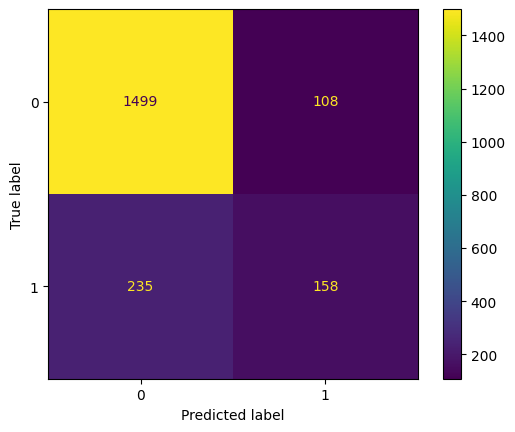

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1607
           1       0.59      0.40      0.48       393

    accuracy                           0.83      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.81      0.83      0.82      2000

